In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [2]:
print(torch.__version__)
print(torchvision.__version__)

2.4.0
0.19.0


In [3]:
train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
 )

In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
print(f"Image shape: {image.shape}")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28])
Image label: Ankle boot


Text(0.5, 1.0, '9')

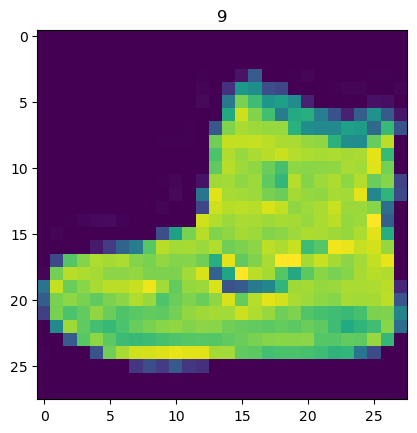

In [10]:
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

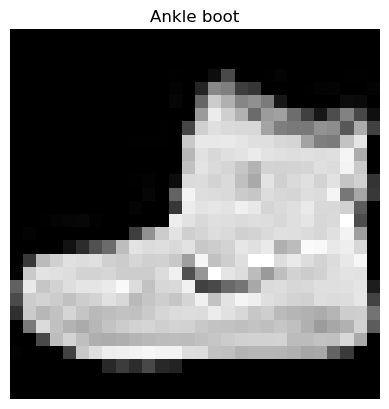

In [11]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)

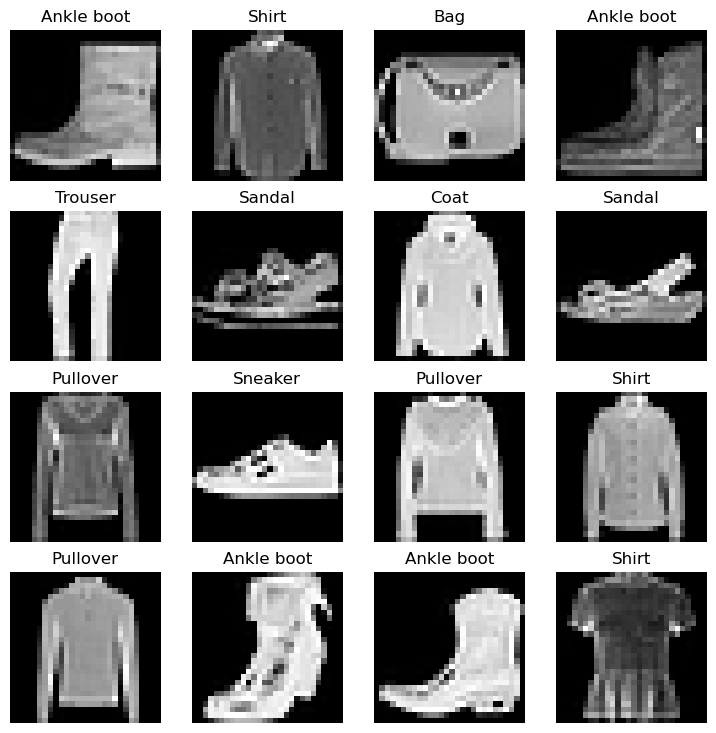

In [12]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows * cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

In [13]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=32,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=32,
    shuffle=False
)

In [14]:
print(f"Dataloaders: {train_dataloader}, {test_dataloader}")
print(f"Dataloaders lengths: {len(train_dataloader)}, {len(test_dataloader)}")

Dataloaders: <torch.utils.data.dataloader.DataLoader object at 0x000001DB8D802050>, <torch.utils.data.dataloader.DataLoader object at 0x000001DB8DC92E90>
Dataloaders lengths: 1875, 313


In [15]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

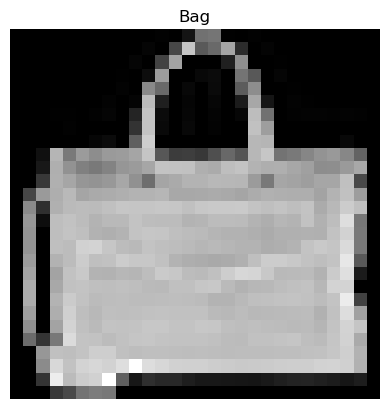

In [16]:
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)

In [17]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [18]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [19]:
class FashionMNISTV2(nn.Module):
    
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=2,
                     padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=2,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                        stride=2)
            
        )
        
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        
        )
        
        self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units,
                 out_features=output_shape)
        )
        
    
    def forward(self, x):
        x = self.block_1(x)
#         print(x.shape)
        x = self.block_2(x)
#         print(x.shape)
        x = self.classifier(x)
#         print(x.shape)
        return x
    
    
torch.manual_seed(42)
model_0 = FashionMNISTV2(input_shape=1,
                        hidden_units=10,
                        output_shape=len(class_names)).to(device)
model_0

FashionMNISTV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1)

In [21]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None):
    
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [22]:
def train_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.SGD,
              accuracy_fn,
              device: torch.device = device):
    
    train_loss, train_acc = 0, 0
    model.train()
    for batch, (X, y) in enumerate(data_loader):
        
        X, y = X.to(device), y.to(device)
        
        y_preds = model(X)
        
        loss = loss_fn(y_preds, y)
        train_loss += loss
        train_acc += accuracy_fn(y, y_preds.argmax(dim=1)) 
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} sample")
            
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    
    if batch % 400 == 0:
        print(f"Train loss: {train_loss:.5f} | train acc: {train_acc:.2f}")
    
    

In [23]:
def test_step(model: torch.nn.Module,
             data_loader: test_dataloader,
             loss_fn: torch.nn.Module,
             optimizer: torch.optim.Optimizer,
             accuracy_fn,
             device: torch.device = device):
    test_loss, test_acc = 0, 0
    
    model.eval()
    
    with torch.inference_mode():
        for X,y in test_dataloader:
        
          test_preds = model(X)
        
          test_loss += loss_fn(test_preds, y)
        
          test_acc += accuracy_fn(y, test_preds.argmax(dim=1))
        
        test_loss /= len(test_dataloader)
    
        test_acc /= len(test_dataloader)
    
        print(f"Test loss: {test_loss:.5f} | test acc: {test_acc:.2f}%\n")
          

In [24]:
torch.manual_seed(42)
def eval_mode(model: torch.nn.Module,
             data_loader: torch.utils.data.DataLoader,
             loss_fn: torch.nn.Module,
             accuracy_fn,
             device: torch.device=device):
    
    loss, acc = 0, 0
    
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            
            y_preds = model(X)
            loss += loss_fn(y_preds, y)
            acc += accuracy_fn(y, y_preds.argmax(dim=1))
            
        loss /= len(data_loader)
        acc /= len(data_loader)
        
        return {
            "model name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc
        }
    
model_0_results = eval_mode(model=model_0, data_loader=test_dataloader,
                           loss_fn=loss_fn, accuracy_fn=accuracy_fn,
                           device=device)

model_0_results

{'model name': 'FashionMNISTV2',
 'model_loss': 2.318403959274292,
 'model_acc': 9.994009584664537}

In [25]:
from tqdm.auto import tqdm
torch.manual_seed(42)
train_time_start = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epochs: {epoch}\n------------")
    
    train_step(model=model_0,
              data_loader=train_dataloader,
              loss_fn = loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn)
    
    test_step(model=model_0,
              data_loader=test_dataloader,
              loss_fn = loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn)
    
train_time_end = timer()

total_train_time = print_train_time(start=train_time_start, end = train_time_end)

  0%|          | 0/3 [00:00<?, ?it/s]

Epochs: 0
------------
Looked at 0/60000 sample
Looked at 12800/60000 sample
Looked at 25600/60000 sample
Looked at 38400/60000 sample
Looked at 51200/60000 sample
Test loss: 0.60283 | test acc: 77.74%

Epochs: 1
------------
Looked at 0/60000 sample
Looked at 12800/60000 sample
Looked at 25600/60000 sample
Looked at 38400/60000 sample
Looked at 51200/60000 sample
Test loss: 0.51961 | test acc: 80.51%

Epochs: 2
------------
Looked at 0/60000 sample
Looked at 12800/60000 sample
Looked at 25600/60000 sample
Looked at 38400/60000 sample
Looked at 51200/60000 sample
Test loss: 0.47149 | test acc: 82.20%

Train time on None: 63.256 seconds


In [26]:
def make_predictions(model: torch.nn.Module,
                    data: list,
                    device: torch.device = device):
    
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)
            
            pred_logits = model(sample)
            
            pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)
            
            pred_probs.append(pred_prob)
                
                
        return torch.stack(pred_probs)
             

In [27]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

  # view the first smaple shape
test_samples[0].shape

torch.Size([1, 28, 28])

In [28]:
pred_probs = make_predictions(model=model_0,
                            data=test_samples)
pred_probs[:2]

tensor([[5.5256e-05, 9.9970e-01, 4.6870e-06, 2.0386e-04, 1.5612e-05, 1.8374e-07,
         4.0166e-06, 8.3208e-09, 7.0141e-06, 5.2641e-06],
        [6.2148e-02, 1.4448e-02, 1.3552e-01, 1.9457e-02, 7.0835e-02, 3.2495e-02,
         2.6440e-01, 3.2931e-03, 3.9612e-01, 1.2832e-03]])

In [29]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([1, 8, 7, 2, 7, 1, 1, 9, 5])

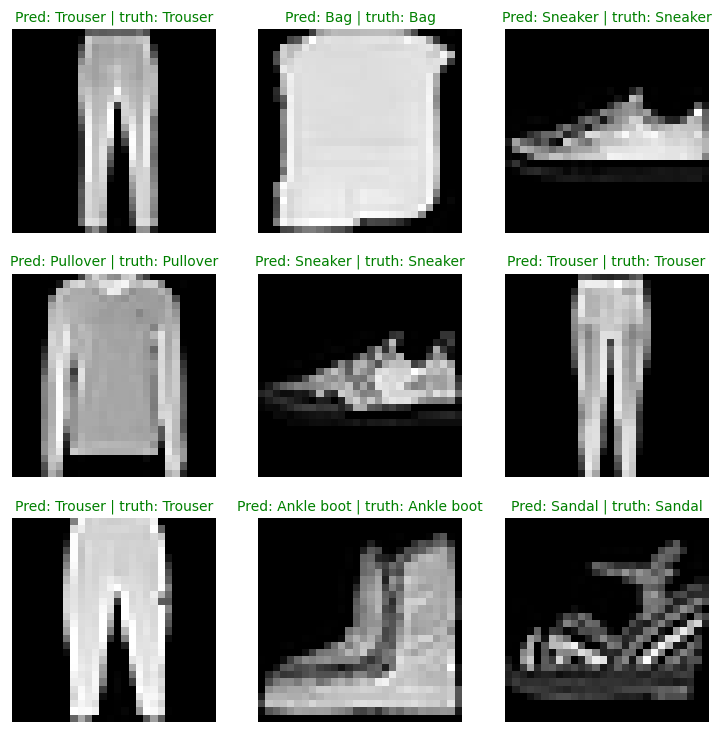

In [30]:
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):

  #create subplot
  plt.subplot(nrows, ncols, i+1)

  #plot the above target image
  plt.imshow(sample.squeeze(), cmap="gray")


# find the predictions (in text form, eg: sandal)
  pred_label = class_names[pred_classes[i]]

  # get the truth label (in text form)
  true_label = class_names[test_labels[i]]

  # creat a title for the plot
  title_text = f"Pred: {pred_label} | truth: {true_label}"

  #check for equality between pred and truth and change color of title text
  if pred_label == true_label :
    plt.title(title_text, fontsize=10, c='g')
  else:
    plt.title(title_text, fontsize=10, c='r')
  plt.axis(False)


In [31]:
from tqdm.auto import tqdm

y_preds = []
model_0.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc = 'making predictions'):
        X, y = X.to(device), y.to(device)
        y_logits = model_0(X)
        y_pred = torch.softmax(y_logits, dim=0).argmax(dim=1)
        y_preds.append(y_pred.cpu())
        
    y_pred_tensor = torch.cat(y_preds)
    print(y_pred_tensor)

making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([5, 2, 1,  ..., 8, 1, 0])


In [32]:
len(y_pred_tensor)

10000

In [33]:
y_pred_tensor[:10]

tensor([5, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [34]:
test_data.targets[:10]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [35]:
import mlxtend

In [36]:
mlxtend.__version__

'0.23.1'

In [37]:
!pip install torchmetrics

   ---------------------------------------- 0.0/869.2 kB ? eta -:--:--
   ---------------------------------------- 10.2/869.2 kB ? eta -:--:--
   -- ------------------------------------ 61.4/869.2 kB 812.7 kB/s eta 0:00:01
   ------ --------------------------------- 133.1/869.2 kB 1.3 MB/s eta 0:00:01
   ------------ --------------------------- 266.2/869.2 kB 1.8 MB/s eta 0:00:01
   ---------------------- ----------------- 481.3/869.2 kB 2.5 MB/s eta 0:00:01
   --------------------------------- ------ 727.0/869.2 kB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 869.2/869.2 kB 3.2 MB/s eta 0:00:00


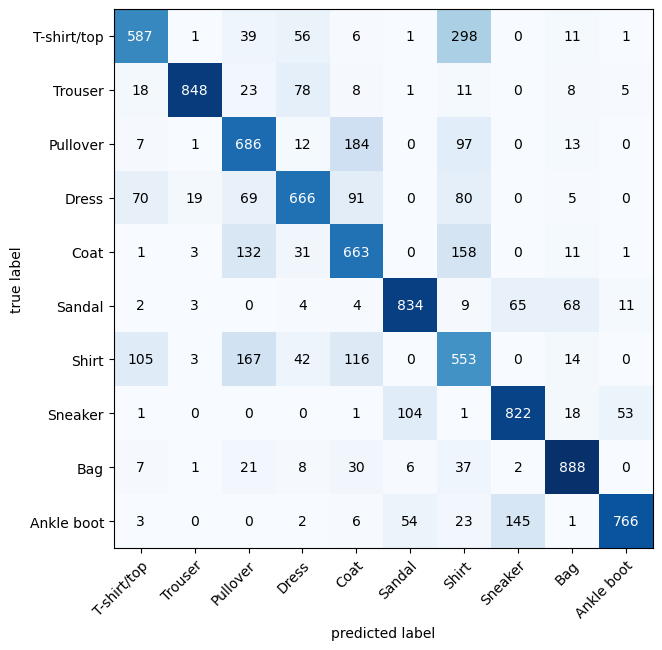

In [38]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensors = confmat(preds=y_pred_tensor, target=test_data.targets)

#plot the confusion matrix

fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensors.numpy(),  # matplotlib like sto work with numpy
    class_names = class_names,
    figsize=(10,7)
)

In [39]:
from pathlib import Path


# crete model dictory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# create model save
MODEL_NAME = "O3_pytorch_version_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# save the model state dict
print(f"SAVING MODEL TO : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

SAVING MODEL TO : models\O3_pytorch_version_model_2.pth


In [40]:
model_0.state_dict()

OrderedDict([('block_1.0.weight',
              tensor([[[[ 0.5655,  0.2770,  0.1175],
                        [-0.0843, -0.1622,  0.2259],
                        [-0.0319, -0.0836,  0.2690]]],
              
              
                      [[[-0.4733,  0.2446, -0.0437],
                        [ 0.2829,  0.6032,  0.1868],
                        [-0.0688,  0.2210, -0.1622]]],
              
              
                      [[[-0.3877, -0.3369, -0.6262],
                        [-0.5094, -0.6976, -0.4243],
                        [-0.6992, -0.7518, -0.8871]]],
              
              
                      [[[-0.4528, -0.8612, -0.8492],
                        [ 0.2614, -1.1344, -0.4977],
                        [ 0.4418, -0.1083,  0.2080]]],
              
              
                      [[[ 0.1809,  0.1495, -0.3351],
                        [-0.0926,  0.2547, -0.2398],
                        [ 0.1765,  0.4694,  0.0967]]],
              
              
           

In [41]:
# create a new instance
torch.manual_seed(42)

loaded_model_0 = FashionMNISTV2(input_shape=1,
                                      hidden_units=10,

                                      output_shape=len(class_names))

#load in the save state_dict()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_0.to(device)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13276\460536168.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH)

FashionMNISTV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [42]:
model_0_results

{'model name': 'FashionMNISTV2',
 'model_loss': 2.318403959274292,
 'model_acc': 9.994009584664537}

In [45]:
# evaluate loaded model
torch.manual_seed(42)

loaded_model_0_results = eval_mode(
    model=loaded_model_0,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

In [46]:
# check if model results are close to each other
torch.isclose(torch.tensor(model_0_results["model_loss"]),
              torch.tensor(loaded_model_0_results["model_loss"]),
              atol=0.00001)

tensor(False)